# Part 03. 통계분석

<br>

-----------

## 6장. 회귀분석

<p style='color:#726a77; text-align:right'>양여진 작성</p>


### 1절. 회귀분석 개념

- 하나 혹은 그 이상의 원인이 종속변수에 미치는 영향을 추적하여 식으로 표현하는 통계기법
- 변수들 사이의 인과관계를 밝히고 모형을 적합하여 관심있는 변수를 예측하거나 추론하기 위해 사용하는 분석 방법
- 독립변수의 개수가 하나인 경우 <b>단순선형회귀분석</b>, 독립변수의 개수가 두 개 이상이면 <b>다중선형회귀분석</b>으로 분석함

<br>

#### 선형회귀분석의 가정

- 독립변수와 종속변수 간의 선형성 (선형회귀분석에서 가장 중요한 가정)
- 오차의 등분산성 : 오차의 분산은 독립변수 값과 무관하게 일정해야 함
- 오차의 독립성 : 예측값의 변화에 따라 오차항이 특정한 패턴을 가지면 안 됨
- 오차의 정규성 : 오차의 분포가 정규분포를 만족해야 함 <b>Q-Q plot</b>, <b>Shapiro-Wilk</b>검정 등을 활용하여 정규성 확인

<br>

<img src="https://www.ssacstat.com/base/component/board/board_12/u_image/290/20151230073919_710513457.png"><br>

### 2절. 단순선형회귀분석

<b>하나의 독립변수</b>가 종속변수에 미치는 영향을 추정할 수 있는 통계기법
<img src ='https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F9906A6465CDBC08C2F' width="400">

<br>

#### 회귀분석 시 검토사항

- <b>모형 내의 회귀계수가 유의한가</b> : 회귀계수에 대한 <span style='color: #CD5C5C'>t통계량</span>의 p-value가 0.05보다 작으면 회귀계수가 통계적으로 유의하다고 볼 수 있음
- <b>모형은 데이터를 얼마나 설명할 수 있는가</b> : <span style='color: #CD5C5C'>결정계수</span>(R-square)를 확인함
    - 결정계수는 0~1의 값을 가짐
    - 추정된 회귀식이 전체 데이터에서 설명할 수 있는 데이터의 비율을 의미함 (높을수록 높은 설명력)
    - 다변량 회귀분석의 경우 포함된 독립변수의 유의성에 관계없이 독립변수의 수가 많아지면 결정계수가 높아지는 경향을 보임<br>
        이를 보완하기 위해 수정된 결정계수(adjusted R square)를 활용하여 모형의 설명력을 판단함
- <b>회귀모형이 통계적으로 유의한가</b> : 회귀분석의 결과로 산출되는 <span style='color: #CD5C5C'>F-통계량</span>의 p-value가 0.05보다 작으면 회귀식이 통계적으로 유의하다고 볼 수 있음<br>
&emsp;F 통계량 : 모델 또는 모델 성분의 유의성을 검정하는 분산분석(ANOVA) 방식에 대한 검정 통계량
- <b>모형이 데이터를 잘 적합하고 있는가</b> : 모형의 잔차를 그리고 <span style='color: #CD5C5C'>회귀진단</span>을 수행해 판단함


<br><br>

<b>[예제]</b>

Cars93 데이터의 EngineSize를 독립변수, Price를 종속변수로 설정하여 단순 선형 회귀분석을 실시한 후, 추정된 회귀모형에 대해 해석하라

In [3]:
import pandas as pd
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from pandas import DataFrame

# 데이터 불러오기
pandas2ri.activate()
MASS = importr("MASS")
r.data('Cars93')
Cars = r['Cars93']

Cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


<br>

scikit-learn을 이용한 방법

> sklearn.linear_model.LinearRegression().fit()

&emsp;&emsp;&emsp;LinearRegression() : 선형회귀분석 모델을 생성하는 함수<br>
&emsp;&emsp;&emsp;fit() : 선형 회귀 모델에 필요한 두 가지 변수(x, y)를 전달

<br>

- 설명변수의 차원을 조정해야 함
- R의 summary()와 같은 기능이 없음
- 기울기와 절편을 따로 호출해서 얻을 수 있음
- 잔차를 자동으로 계산해주는 기능이 없음

기울기 : [5.56294028]
절편 : 4.669188361408882
잔차 :
 [  1.21751914  11.42940276   8.85457887  17.45457887   5.86052067
  -1.20765697  -5.00836141 -12.67794793   0.49163859   2.77240429
   9.84128637  -3.50765697  -5.50765697  -8.4831853   -1.00765697
  -9.50836141 -11.98983155 -13.68388974   1.62205207  -4.62689127
  -5.55800919   6.47310873  -3.81359877  -5.60765697  -5.27653905
  -2.35800919  -2.97653905   4.44199081  -0.81359877  -4.83947933
  -4.50101072  -4.58248086  -6.163951    -1.563951    -1.79506891
  -1.45800919  -1.15800919  -9.35871363  -1.83212864  -1.0698928
   2.336049    -0.91359877   0.59234303  -5.01359877  -4.68248086
  -3.01359877  -1.89506891  18.1975804    6.64199081  13.84199081
   8.49163859   5.84128637  -5.2698928   -3.08248086  -2.07653905
  -2.25800919  20.59898928  14.436049    39.42940276   0.5301072
 -10.90836141  -2.71359877   4.74199081  -1.7698928   -2.32024502
  -2.25800919   0.14199081  -3.963951    -0.60765697  -6.30836141
  -5.10836141  -0.28248086  -4

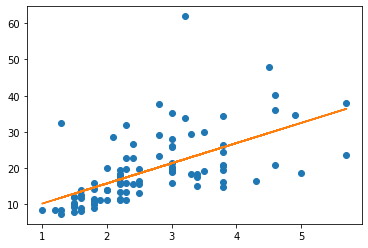

In [28]:
#pip install sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 회귀모델 선언
x = Cars['EngineSize'].values.reshape(-1,1)  # fit 함수가 x 값으로 2차원 array를 받으므로 reshape해 줌
lr.fit(x, Cars['Price'])

# 기울기와 절편은 따로 호출하여 확인랑 수 있다
print('기울기 :', lr.coef_)
print('절편 :', lr.intercept_)

# 추정된 값을 보기 위해서는 모델.predict(x)를 출력한다
y_predicted = lr.predict(x)

# 잔차를 확인하는 방법 : y값과 추정값의 차를 계산
residual = Cars['Price'] - lr.predict(x)
print('잔차 :\n', residual.values)

# plot로 확인하는 방법
import matplotlib.pyplot as plt
plt.plot(Cars['EngineSize'], Cars['Price'], 'o')
plt.plot(Cars['EngineSize'], lr.predict(x))
plt.show()

<br>

statsmodels를 이용한 방법

> ols('y ~ x',data=df).fit()

<br>

- 모델.summary() : 적합 결과를 요약하여 제시함
- 모델.params.변수명(또는 Intercept) : 기울기(또는 절편)의 추정값 획득
- 모델.fittedvalues : 추정값
- 모델.resid : 잔차
- 모델.predict(exog=dict(설명변수명=[값])) : 새로운 데이터에 대한 예측값 - predict 함수의 exog 인자에 설명변수의 이름과 값을 딕셔너리로 제공

In [47]:
#pip install statsmodels
from statsmodels.formula.api import ols

# 단순선형회귀모형 적합
fit = ols('Price ~ EngineSize',data=Cars).fit()

# 회귀 계수
print("절편 :", fit.params.Intercept) ## 절편
print("기울기 :", fit.params.EngineSize) ## 기울기

# 추정값 & 잔차
print("\n추정값 :\n", fit.fittedvalues)
print("\n잔차 :\n", fit.resid )

# 예측
print("\n예측 :\n", fit.predict(exog=dict(EngineSize=[6])))

# 단순선형회귀모형 적합 결과 요약 정보
fit.summary()

절편 : 4.6691883614088905
기울기 : 5.562940275650843

추정값 :
 1     14.682481
2     22.470597
3     20.245421
4     20.245421
5     24.139479
        ...    
89    18.576539
90    15.795069
91    20.245421
92    17.463951
93    18.020245
Length: 93, dtype: float64

잔차 :
 1     14.682481
2     22.470597
3     20.245421
4     20.245421
5     24.139479
        ...    
89    18.576539
90    15.795069
91    20.245421
92    17.463951
93    18.020245
Length: 93, dtype: float64

예측 :
 0    38.04683
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     50.51
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.59e-10
Time:                        22:01:45   Log-Likelihood:                -321.85
No. Observations:                  93   AIC:                             647.7
Df Residuals:                      91   BIC:                             652.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6692      2.239      2.085      0.040       0.222       9.117
EngineSize     5.5629      0.783      7.107      0.000       4.008       7.118
==============================================================================
Omnibus:                       54.332   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.069
Skew:                           1.917   Prob(JB):                     7.31e-48
Kurtosis:                       9.428   Cond. No.                         8.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

독립변수는 EngineSize이고 종속변수는 Price이다.<br>
회귀식은 Price = EngineSize * 5.5629 + 4.6692 와 같이 도출할 수 있다<br>
상수항과 독립변수의 회귀계수에 대한 p-value가 각각 0.04와 0.00으로 0.05보다 작으므로 통계적으로 유의하다고 판단할 수 있다<br>
결정계수는 0.35로, 이 회귀모형의 데이터에 대한 설명력은 35% 이다<br>
F-통계량은 50.51이며, F-통계량의 p-value는 2.59-e10으로 0.05보다 매우 작기 때문에 추정된 회귀 모형은 통계적으로 유의하다고 볼 수 있다

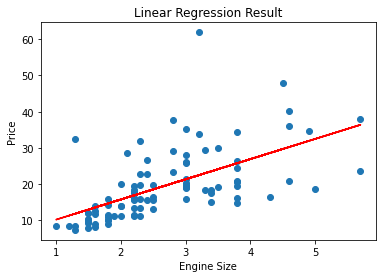

In [87]:
# 회귀모형의 시각화
plt.scatter(Cars['EngineSize'], Cars['Price']) ## 원 데이터 산포도
plt.plot(Cars['EngineSize'], fit.fittedvalues, color='red') ## 회귀직선 추가
 
plt.xlabel('Engine Size', fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

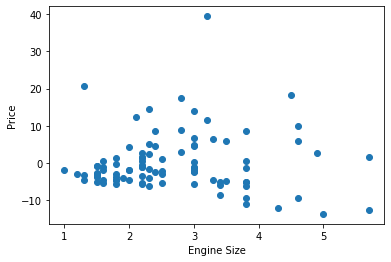

In [92]:
# 잔차도
# 잔차가 정규성을 지니는지 확인

plt.scatter(Cars['EngineSize'], fit.resid) ## 잔차도 출력

plt.xlabel('Engine Size', fontsize=10)
plt.ylabel('잔차',fontsize=10)
plt.show()

C:\Users\ty009\anaconda3\envs\ADP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

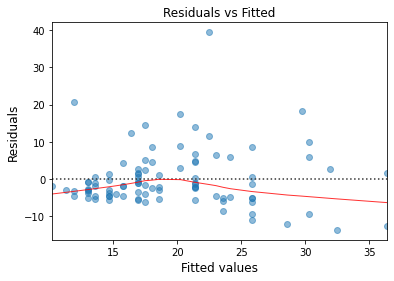

In [104]:
# 잔차도 (다른 방법)

#pip install seaborn
import seaborn as sns

sns.residplot(fit.fittedvalues, Cars['Price'], data=Cars,
              lowess=True, # 잔차 선을 추가함
                            # 선형회귀 모형은 기울기가 0인 직선을 가지는 것이 이상적임
                            # 활모양을 지니는 것은 데이터의 비선형적인 특징 중 일부를 포착하지 못했다는 뜻
              scatter_kws={'alpha': 0.5}, # 점의 투명도
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}) # 잔차 선의 스타일 지정

plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Residuals',fontsize=12)

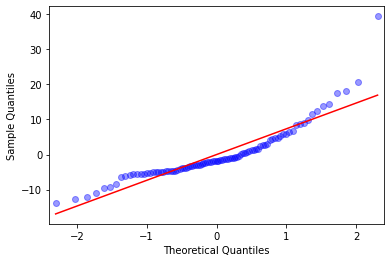

In [98]:
# Q-Q plot
# 잔차가 정규분포를 따르는지 확인

import statsmodels.api as sm 
import pylab as py

sm.qqplot(fit.resid, line="r", alpha=0.4) 
# line은 참조선을 그리는 것으로 '45'(45도 선), 's'(표준화된 라인), 'r'(회귀선), 'q'(사분위수를 통과하는 선) 옵션이 있음
py.show()

C:\Users\ty009\anaconda3\envs\ADP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

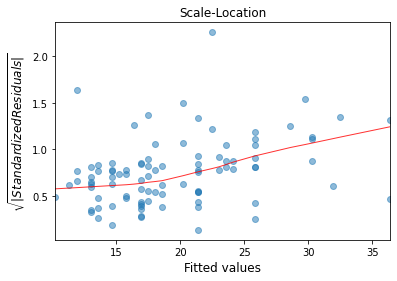

In [105]:
# Scale-Location plot
# 잔차가 등분산성을 벗어났는지 확인

import numpy as np

residuals_abs = np.abs(fit.get_influence().resid_studentized_internal)
# OLSResults.get_influence() : 영향 및 특이치 측정을 계산
# OLSInfluence.resid_studentized_internal : 분산을 사용하여 잔차를 스튜던트화(통계를 표본 표준 편차로 나눔) 함
# np.abs() : 절대 값 계산
# np.sqrt() : 제곱근 반환

plt.scatter(fit.fittedvalues, np.sqrt(residuals_abs), alpha=0.5)
sns.regplot(fit.fittedvalues, np.sqrt(residuals_abs),
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.title('Scale-Location')
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('$\sqrt{|Standardized Residuals|}$', fontsize=12)

<StemContainer object of 3 artists>

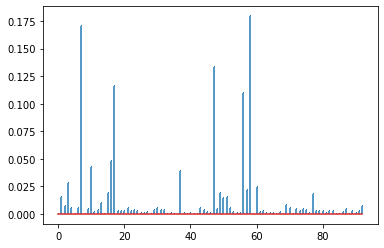

In [107]:
# Cook's distance
# 한 관측치가 회귀 모형에 미치는 영향을 나타냄
# 영향이 1 이상인 경우 매우 큰 영향을 주는 관측값으로 간주함

influence = fit.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

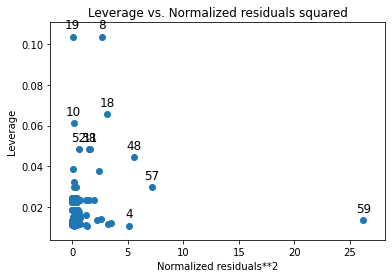

In [115]:
# Residuals & Leverage plot
# 관측치가 다른 관측치 집단으로부터 떨어진 정도를 나타냄
# 쿡의 거리가 0.5 이상인 것들은 예측치를 크게 벗어난 관측치임 (이를 제거하고 다시 분석 수행하기도 함)

from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(fit,)
plt.show()

C:\Users\ty009\anaconda3\envs\ADP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


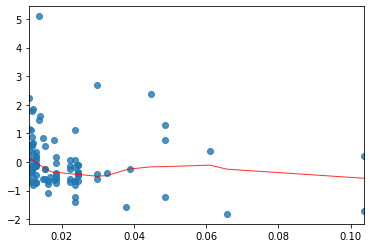

In [125]:
# Residuals & Leverage plot (다른 방법)
# 쿡의 거리가 0.5 이상인 것들을 쉽게 확인 가능

influence = fit.get_influence()
sns.regplot(influence.hat_matrix_diag, influence.resid_studentized_internal,
            scatter=True,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});